# TODO:

Try:

* Different models:
  * Sarsa Linear (done)
  * Sarsa ANN (done)
  * Q-learning Linear (done)
  * Q-learning ANN without experience replay (done)
  * Q-learning ANN with experience replay
  * Q-learning ANN with experience replay and policy/target network split?
* Different loss functions:
  * MSE -> leads to updates as in Sutton, Barto
  * SmoothL1?
  * What do they use in DQN paper?

In [1]:
import sys
sys.path.append("..")
from models import *
from rl_algos import *
from utils import *
import gymnasium as gym
from torch import optim

# Settings

In [2]:
ENVIRONMENT_ID = "CartPole-v1"
NUM_EPISODES = 1000
GRAD_CLIP_VALUE = 100
MEMORY_SIZE = 10000
BATCH_SIZE = 64
EPS_START = 1
EPS_MIN = 0.01
EPS_DECAY = 0.995
NN_HIDDEN_LAYER_SIZE = 24
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("PyTorch device:", device)

PyTorch device: cuda


# Sarsa

## Linear model

Average return per episode: 21.424


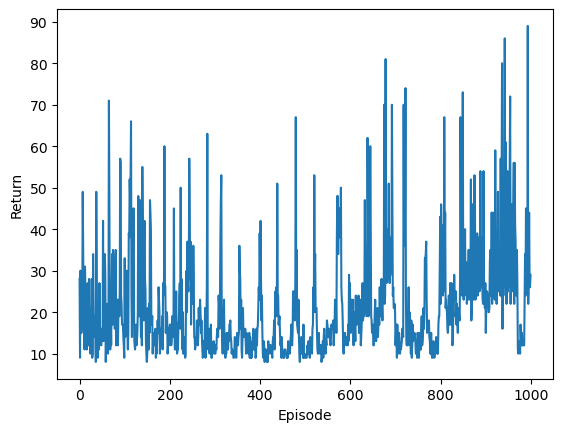

In [3]:
env = gym.make(ENVIRONMENT_ID)
model = LinearModel(env.observation_space.shape[0], env.action_space.n).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_func = nn.MSELoss()
returns = train_episodic_semi_grad_sarsa(
    env, model, loss_func, optimizer, device, NUM_EPISODES, EPS_START, EPS_MIN, EPS_DECAY, GRAD_CLIP_VALUE
)
env.close()
plot_returns(returns)

## Neural Network Model

Average return per episode: 50.003


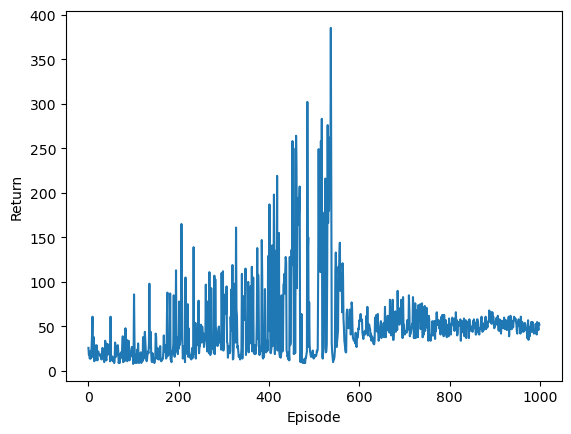

In [4]:
env = gym.make(ENVIRONMENT_ID)
model = SimpleNN(env.observation_space.shape[0], env.action_space.n, NN_HIDDEN_LAYER_SIZE).to(device)
optimizer = optim.AdamW(model.parameters(), lr=0.001, amsgrad=True)
loss_func = nn.MSELoss()
returns = train_episodic_semi_grad_sarsa(
    env, model, loss_func, optimizer, device, NUM_EPISODES, EPS_START, EPS_MIN, EPS_DECAY, GRAD_CLIP_VALUE
)
env.close()
plot_returns(returns)

# Q-learning

## Linear model

Average return per episode: 22.881


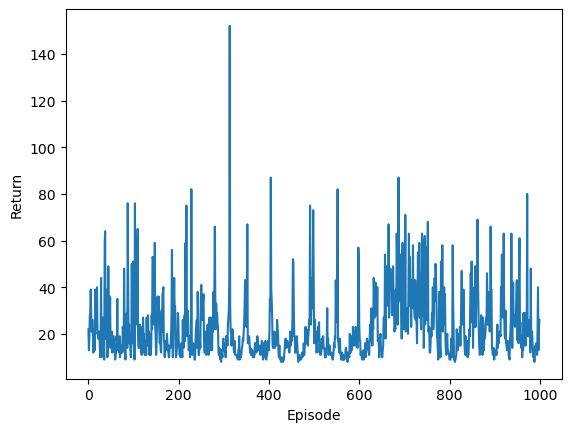

In [5]:
env = gym.make(ENVIRONMENT_ID)
model = LinearModel(env.observation_space.shape[0], env.action_space.n).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_func = nn.MSELoss()
returns = train_episodic_semi_grad_qlearning(
    env, model, loss_func, optimizer, device, NUM_EPISODES, EPS_START, EPS_MIN, EPS_DECAY, GRAD_CLIP_VALUE
)
env.close()
plot_returns(returns)

## Neural Network Model

Average return per episode: 66.034


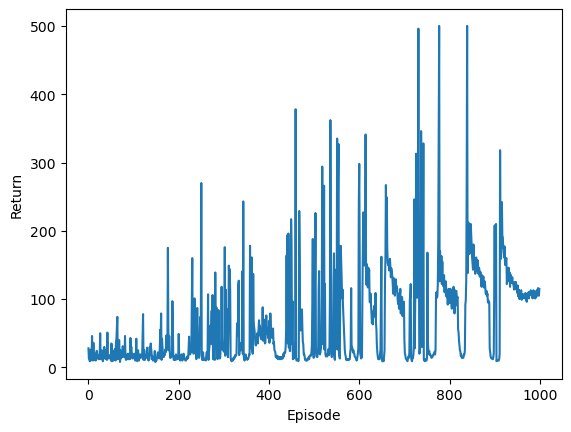

In [6]:
env = gym.make(ENVIRONMENT_ID)
model = SimpleNN(env.observation_space.shape[0], env.action_space.n, NN_HIDDEN_LAYER_SIZE).to(device)
optimizer = optim.AdamW(model.parameters(), lr=0.001, amsgrad=True)
loss_func = nn.MSELoss()
returns = train_episodic_semi_grad_qlearning(
    env, model, loss_func, optimizer, device, NUM_EPISODES, EPS_START, EPS_MIN, EPS_DECAY, GRAD_CLIP_VALUE
)
env.close()
plot_returns(returns)

# Q-learning with experience replay

## Linear Model

Average return per episode: 25.815


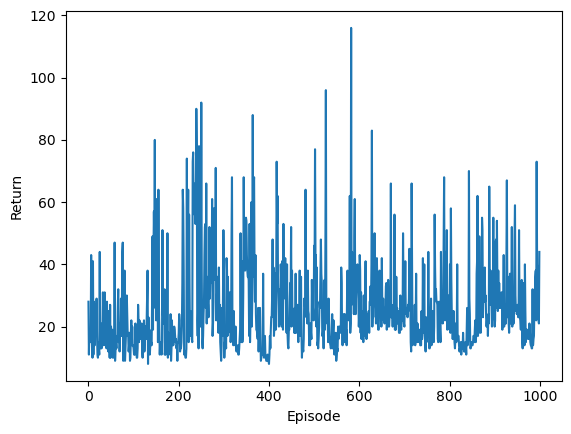

In [7]:
env = gym.make(ENVIRONMENT_ID)
model = LinearModel(env.observation_space.shape[0], env.action_space.n).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_func = nn.MSELoss()
returns = train_episodic_semi_grad_qlearning_exp_replay(
    env, model, loss_func, optimizer, device,
    NUM_EPISODES, EPS_START, EPS_MIN, EPS_DECAY, MEMORY_SIZE, BATCH_SIZE, GRAD_CLIP_VALUE
)
env.close()
plot_returns(returns)

## Neural Network Model

Average return per episode: 107.283


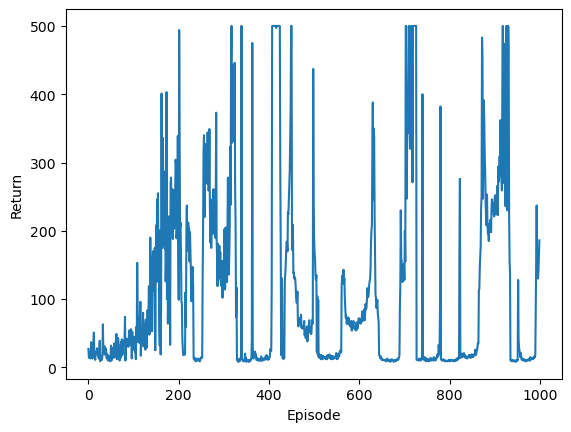

In [8]:
env = gym.make(ENVIRONMENT_ID)
model = SimpleNN(env.observation_space.shape[0], env.action_space.n, NN_HIDDEN_LAYER_SIZE).to(device)
optimizer = optim.AdamW(model.parameters(), lr=0.001)
#optimizer = optim.AdamW(model.parameters(), lr=0.001, amsgrad=True)
loss_func = nn.MSELoss()
returns = train_episodic_semi_grad_qlearning_exp_replay(
    env, model, loss_func, optimizer, device,
    NUM_EPISODES, EPS_START, EPS_MIN, EPS_DECAY, MEMORY_SIZE, BATCH_SIZE, GRAD_CLIP_VALUE
)
env.close()
plot_returns(returns)